# S&P 500 Analysis

## Import the Packages, Functions and Data

In [1]:
import pandas as pd
from EDA_functions import EDA, normality_check,stationarity_check,decomposition_plot,daily_returns
from Baseline_functions import capital_calculation, calculate_macd_signals, profit_trades, loss_trades
from DQN_functions import create_states, ReplayMemory, DQNAgent,train_agent,evaluate_agent, ConvDQN,plot_training,create_action_episode_df, plot_dual_axis
import torch
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle('data/FTSE100.pkl')

## EDA

### Visual

In [4]:
EDA(df)

alt.VConcatChart(...)

In [5]:
#highest closing price row
print("Highest closing price row")
display(df[df['Close'] == df['Close'].max()])

#lowest closing price row
print("Lowest closing price row")
display(df[df['Close'] == df['Close'].min()])

#highest return row
print("Highest return row")
display(df[df['daily_return'] == df['daily_return'].max()])

#lowest return row
print("Lowest return row")
display(df[df['daily_return'] == df['daily_return'].min()])

Highest closing price row


Open         High     Low        Close    Adj Close  \
Date                                                                     
2023-02-20  8004.399902  8020.100098  7995.5  8014.299805  8014.299805   

               Volume  daily_return  cumulative_return  
Date                                                    
2023-02-20  696068100      0.001237           1.827371

Lowest closing price row


Open         High          Low        Close    Adj Close  \
Date                                                                          
2009-03-03  3625.800049  3676.899902  3497.300049  3512.100098  3512.100098   

                Volume  daily_return  cumulative_return  
Date                                                     
2009-03-03  1550463500     -0.031359           0.800807

Highest return row


Open         High     Low   Close  Adj Close      Volume  \
Date                                                                     
2008-11-24  3781.0  4153.100098  3781.0  4153.0     4153.0  1635116900   

            daily_return  cumulative_return  
Date                                         
2008-11-24      0.098387           0.946941

Lowest return row


Open    High     Low   Close  Adj Close      Volume  \
Date                                                                
2020-03-12  5876.5  5876.5  5237.5  5237.5     5237.5  2209275500   

            daily_return  cumulative_return  
Date                                         
2020-03-12     -0.108738           1.194222

In [7]:
#correration matrix heatmap, values rounded to 2 decimal places
print("Correlation matrix")
(df.corr()).round(4)

Correlation matrix


Open    High     Low   Close  Adj Close  Volume  \
Open               1.0000  0.9991  0.9987  0.9978     0.9978 -0.4568   
High               0.9991  1.0000  0.9987  0.9990     0.9990 -0.4544   
Low                0.9987  0.9987  1.0000  0.9992     0.9992 -0.4635   
Close              0.9978  0.9990  0.9992  1.0000     1.0000 -0.4607   
Adj Close          0.9978  0.9990  0.9992  1.0000     1.0000 -0.4607   
Volume            -0.4568 -0.4544 -0.4635 -0.4607    -0.4607  1.0000   
daily_return      -0.0399 -0.0074 -0.0005  0.0258     0.0258 -0.0504   
cumulative_return  0.9978  0.9990  0.9992  1.0000     1.0000 -0.4607   

                   daily_return  cumulative_return  
Open                    -0.0399             0.9978  
High                    -0.0074             0.9990  
Low                     -0.0005             0.9992  
Close                    0.0258             1.0000  
Adj Close                0.0258             1.0000  
Volume                  -0.0504            -0.4607  
daily_return             1.0000             0.0258  
cumulative_return        0.0258             1.0000

In [6]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  5050.000000  5050.000000  5050.000000  5050.000000  5050.000000   
mean   6304.149268  6343.648082  6264.227885  6304.836515  6304.836515   
std     960.841773   958.170026   963.935647   960.747790   960.747790   
min    3512.100098  3564.800049  3460.699951  3512.100098  3512.100098   
25%    5681.525024  5727.550049  5642.699951  5681.625122  5681.625122   
50%    6367.750000  6404.750000  6326.850098  6368.699951  6368.699951   
75%    7145.300171  7187.075195  7104.274902  7146.450195  7146.450195   
max    8014.299805  8047.100098  7995.500000  8014.299805  8014.299805   

             Volume  daily_return  cumulative_return  
count  5.050000e+03   5050.000000        5050.000000  
mean   1.009383e+09      0.000179           1.437589  
std    4.404832e+08      0.011084           0.219064  
min    8.378200e+06     -0.108738           0.800807  
25%    6.946560e+08     -0.004697           1.295489  
50%    8.612432e+08      0.000555           1.452151  
75%    1.259538e+09      0.005505           1.629489  
max    3.761301e+09      0.098387           1.827371

### Without Differencing

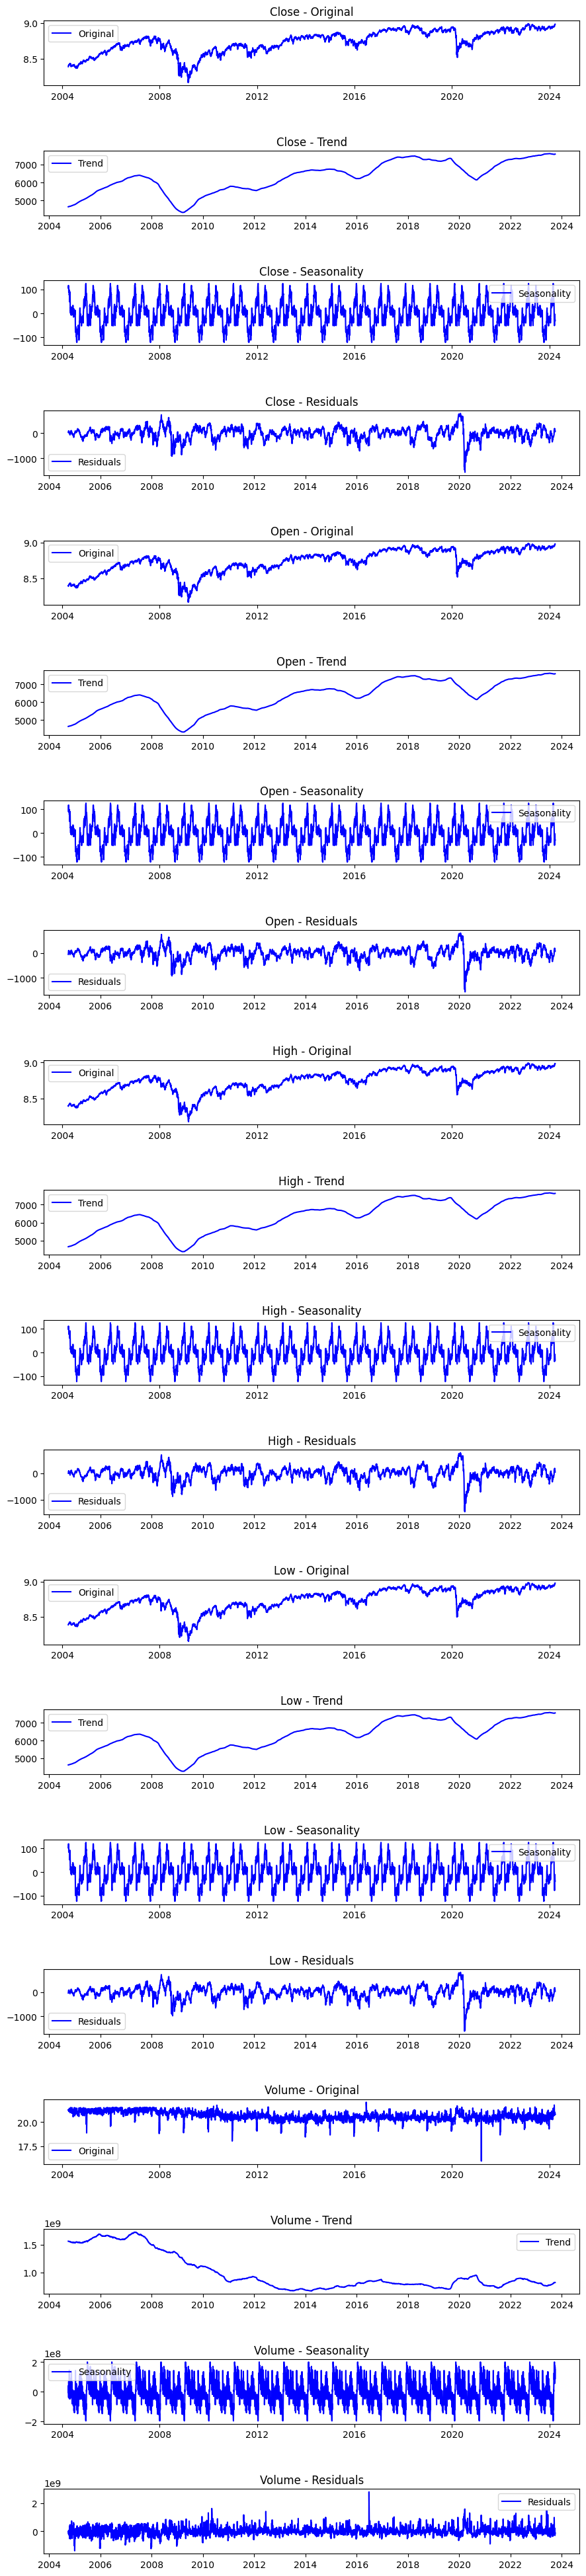

In [7]:
decomposition_plot(df,0)


Results of Dickey-Fuller Test for Close: 

Test Statistic                   -2.278295
p-value                           0.179064
#Lags Used                        7.000000
Number of Observations Used    5042.000000
Critical Value (1%)              -3.431648
Critical Value (5%)              -2.862113
Critical Value (10%)             -2.567075
dtype: float64

Results of Dickey-Fuller Test for Open: 

Test Statistic                   -2.296355
p-value                           0.173146
#Lags Used                        7.000000
Number of Observations Used    5042.000000
Critical Value (1%)              -3.431648
Critical Value (5%)              -2.862113
Critical Value (10%)             -2.567075
dtype: float64

Results of Dickey-Fuller Test for High: 

Test Statistic                   -2.198105
p-value                           0.206934
#Lags Used                        2.000000
Number of Observations Used    5047.000000
Critical Value (1%)              -3.431646
Critical Value (5%)    

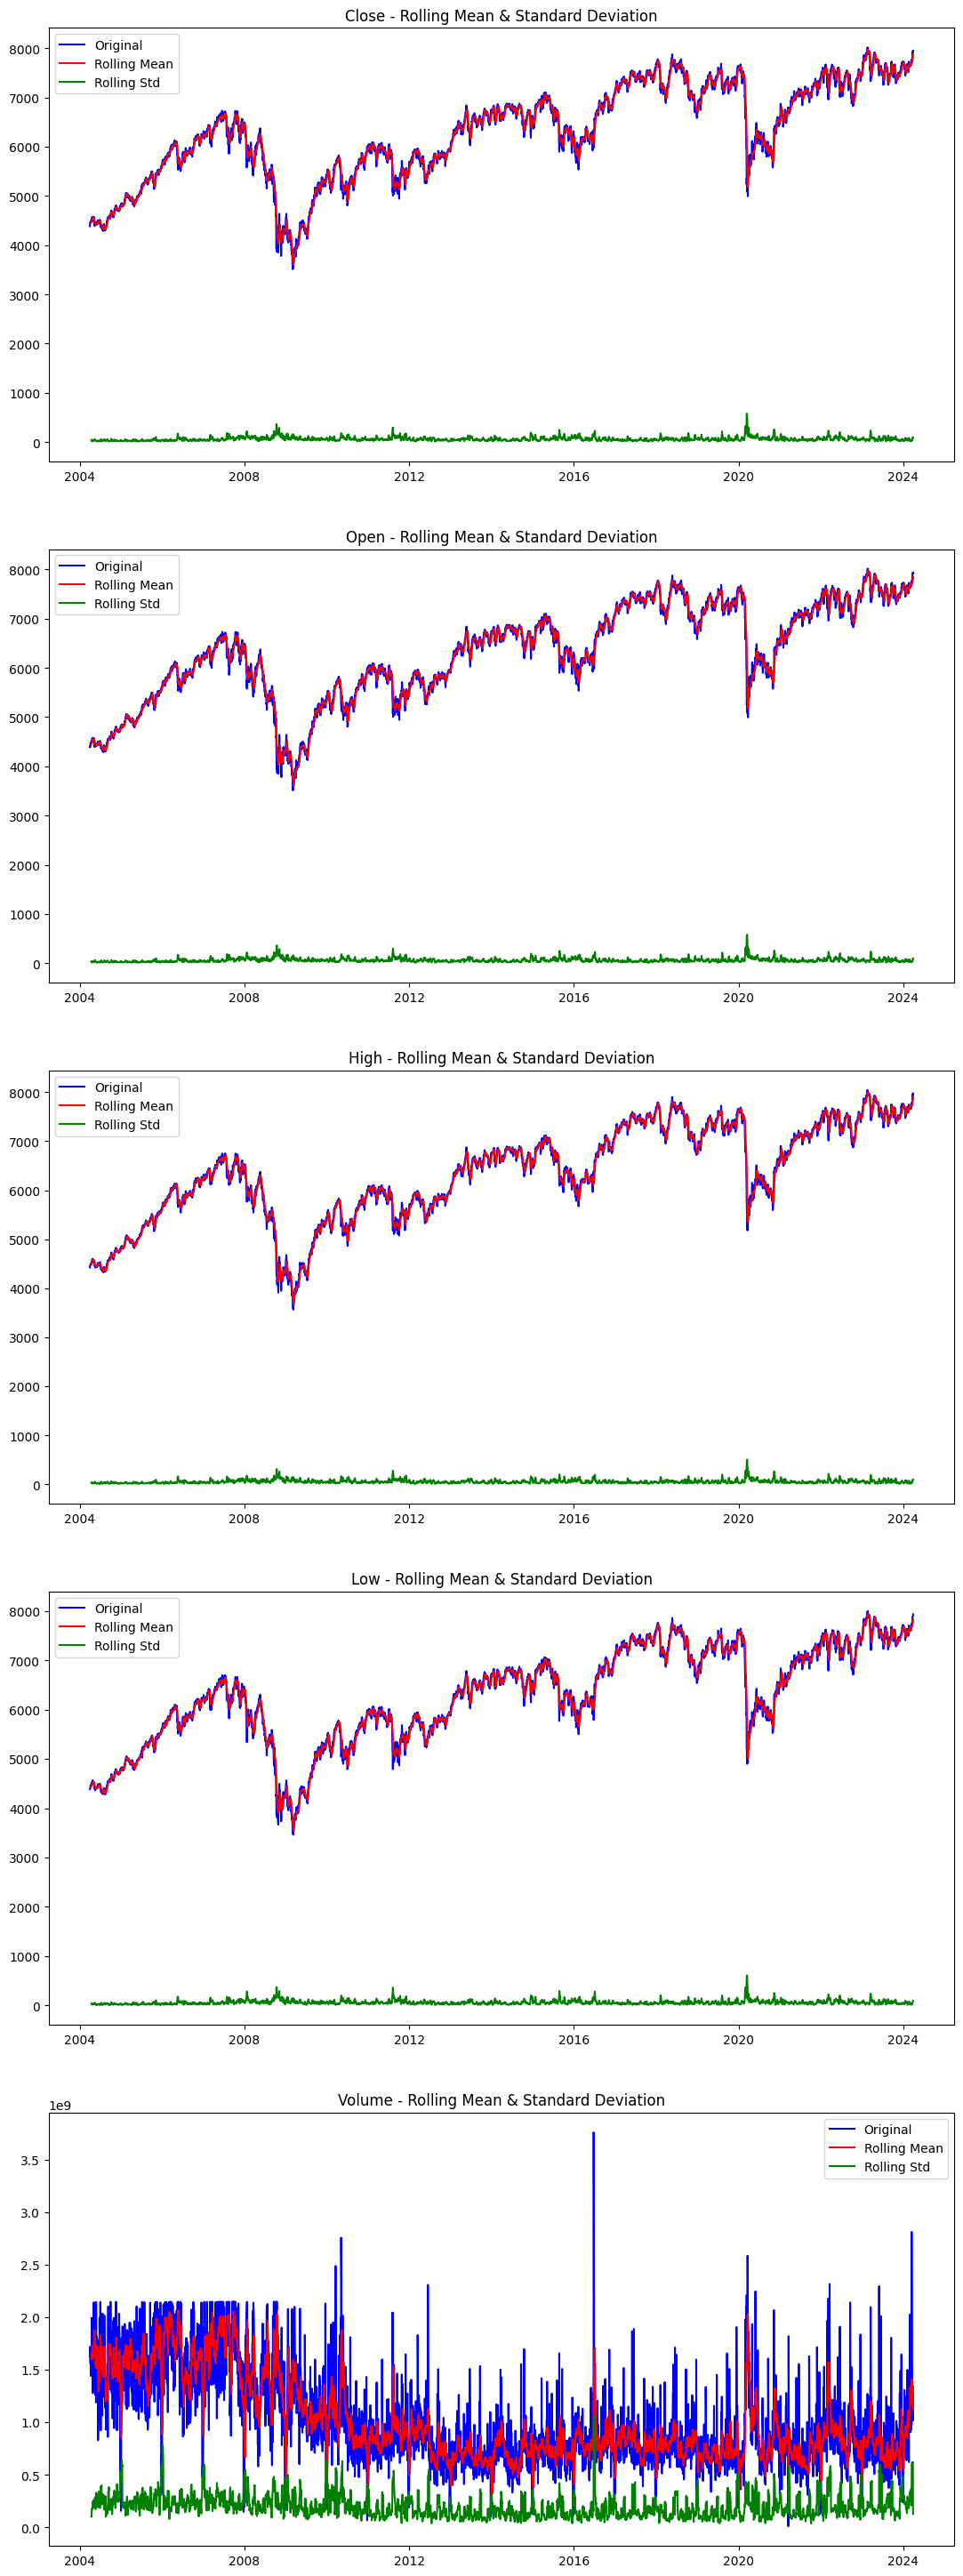

In [8]:
stationarity_check(df,0)

In [9]:
normality_check(df,0)


Normality Check for Close:
Jarque-Bera Test ---- statistic: 227.06122026333702, p-value: 4.946323226391425e-50
Normal Test ---- statistic: 292.1596500599104, p-value: 3.6169130798097283e-64

Normality Check for Open:
Jarque-Bera Test ---- statistic: 227.4349269970066, p-value: 4.1032984537971193e-50
Normal Test ---- statistic: 292.96193568611636, p-value: 2.4217201865917e-64

Normality Check for High:
Jarque-Bera Test ---- statistic: 229.81577045225472, p-value: 1.2477843063688296e-50
Normal Test ---- statistic: 299.62805998315173, p-value: 8.641586131752403e-66

Normality Check for Low:
Jarque-Bera Test ---- statistic: 224.19247473143497, p-value: 2.075977632646938e-49
Normal Test ---- statistic: 283.6668881426518, p-value: 2.5264917852378135e-62

Normality Check for Volume:
Jarque-Bera Test ---- statistic: 877.0800707310651, p-value: 3.503342092060953e-191
Normal Test ---- statistic: 625.2057590706173, p-value: 1.730989329607904e-136


### After 1st Difference

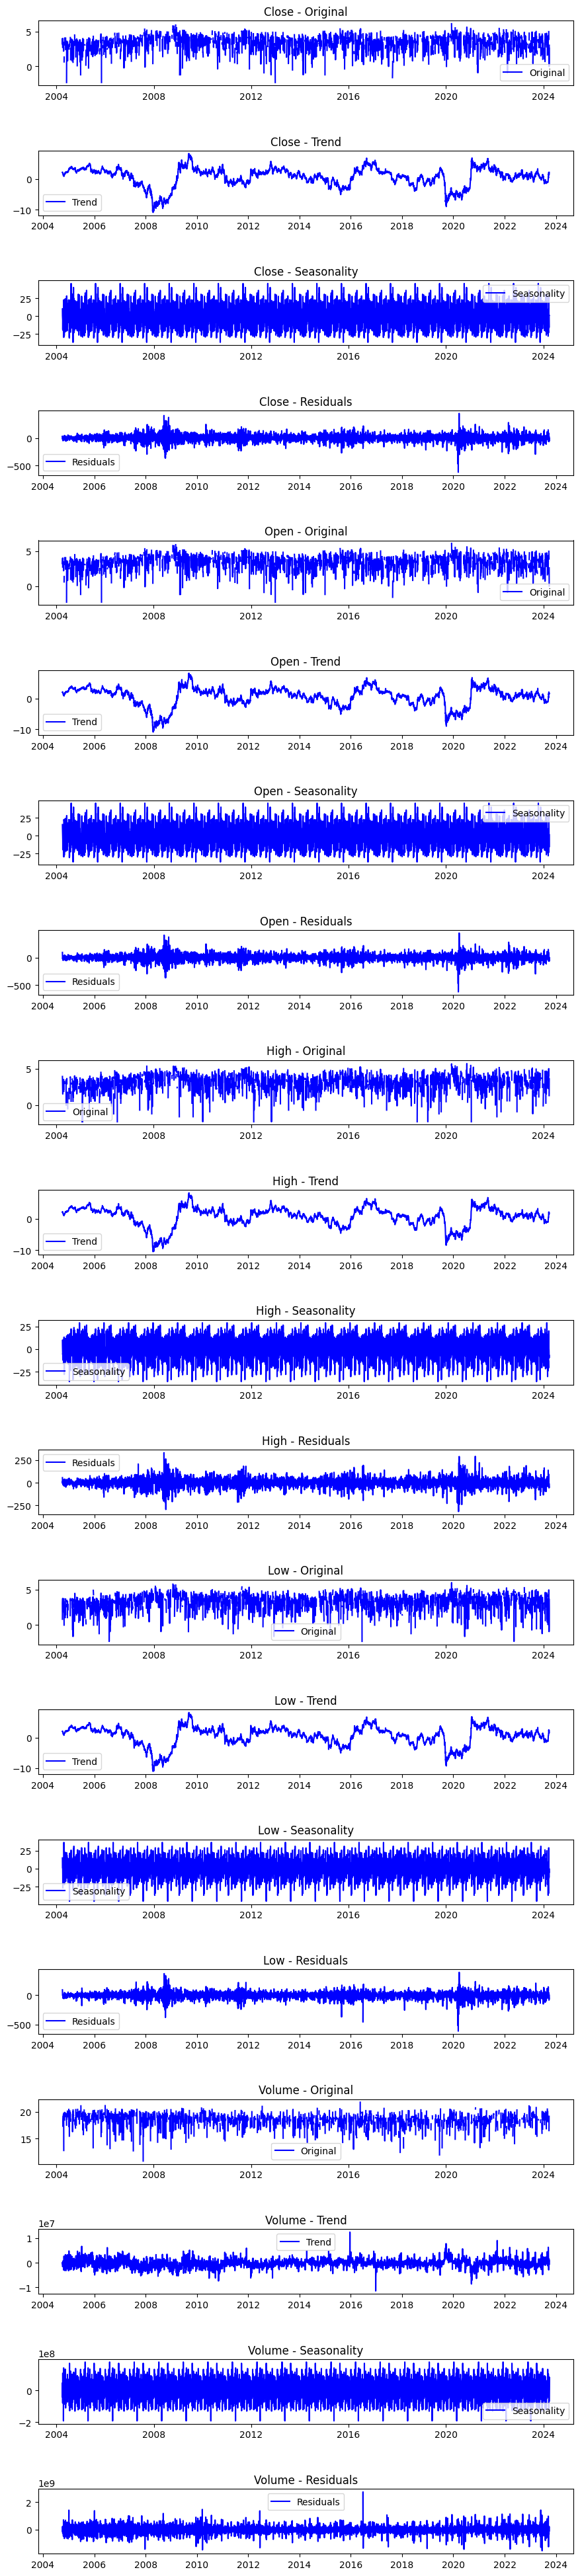

In [10]:
decomposition_plot(df,1)


Results of Dickey-Fuller Test for Close: 

Test Statistic                  -27.300178
p-value                           0.000000
#Lags Used                        6.000000
Number of Observations Used    5042.000000
Critical Value (1%)              -3.431648
Critical Value (5%)              -2.862113
Critical Value (10%)             -2.567075
dtype: float64

Results of Dickey-Fuller Test for Open: 

Test Statistic                  -27.307007
p-value                           0.000000
#Lags Used                        6.000000
Number of Observations Used    5042.000000
Critical Value (1%)              -3.431648
Critical Value (5%)              -2.862113
Critical Value (10%)             -2.567075
dtype: float64

Results of Dickey-Fuller Test for High: 

Test Statistic                  -48.396051
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    5047.000000
Critical Value (1%)              -3.431646
Critical Value (5%)    

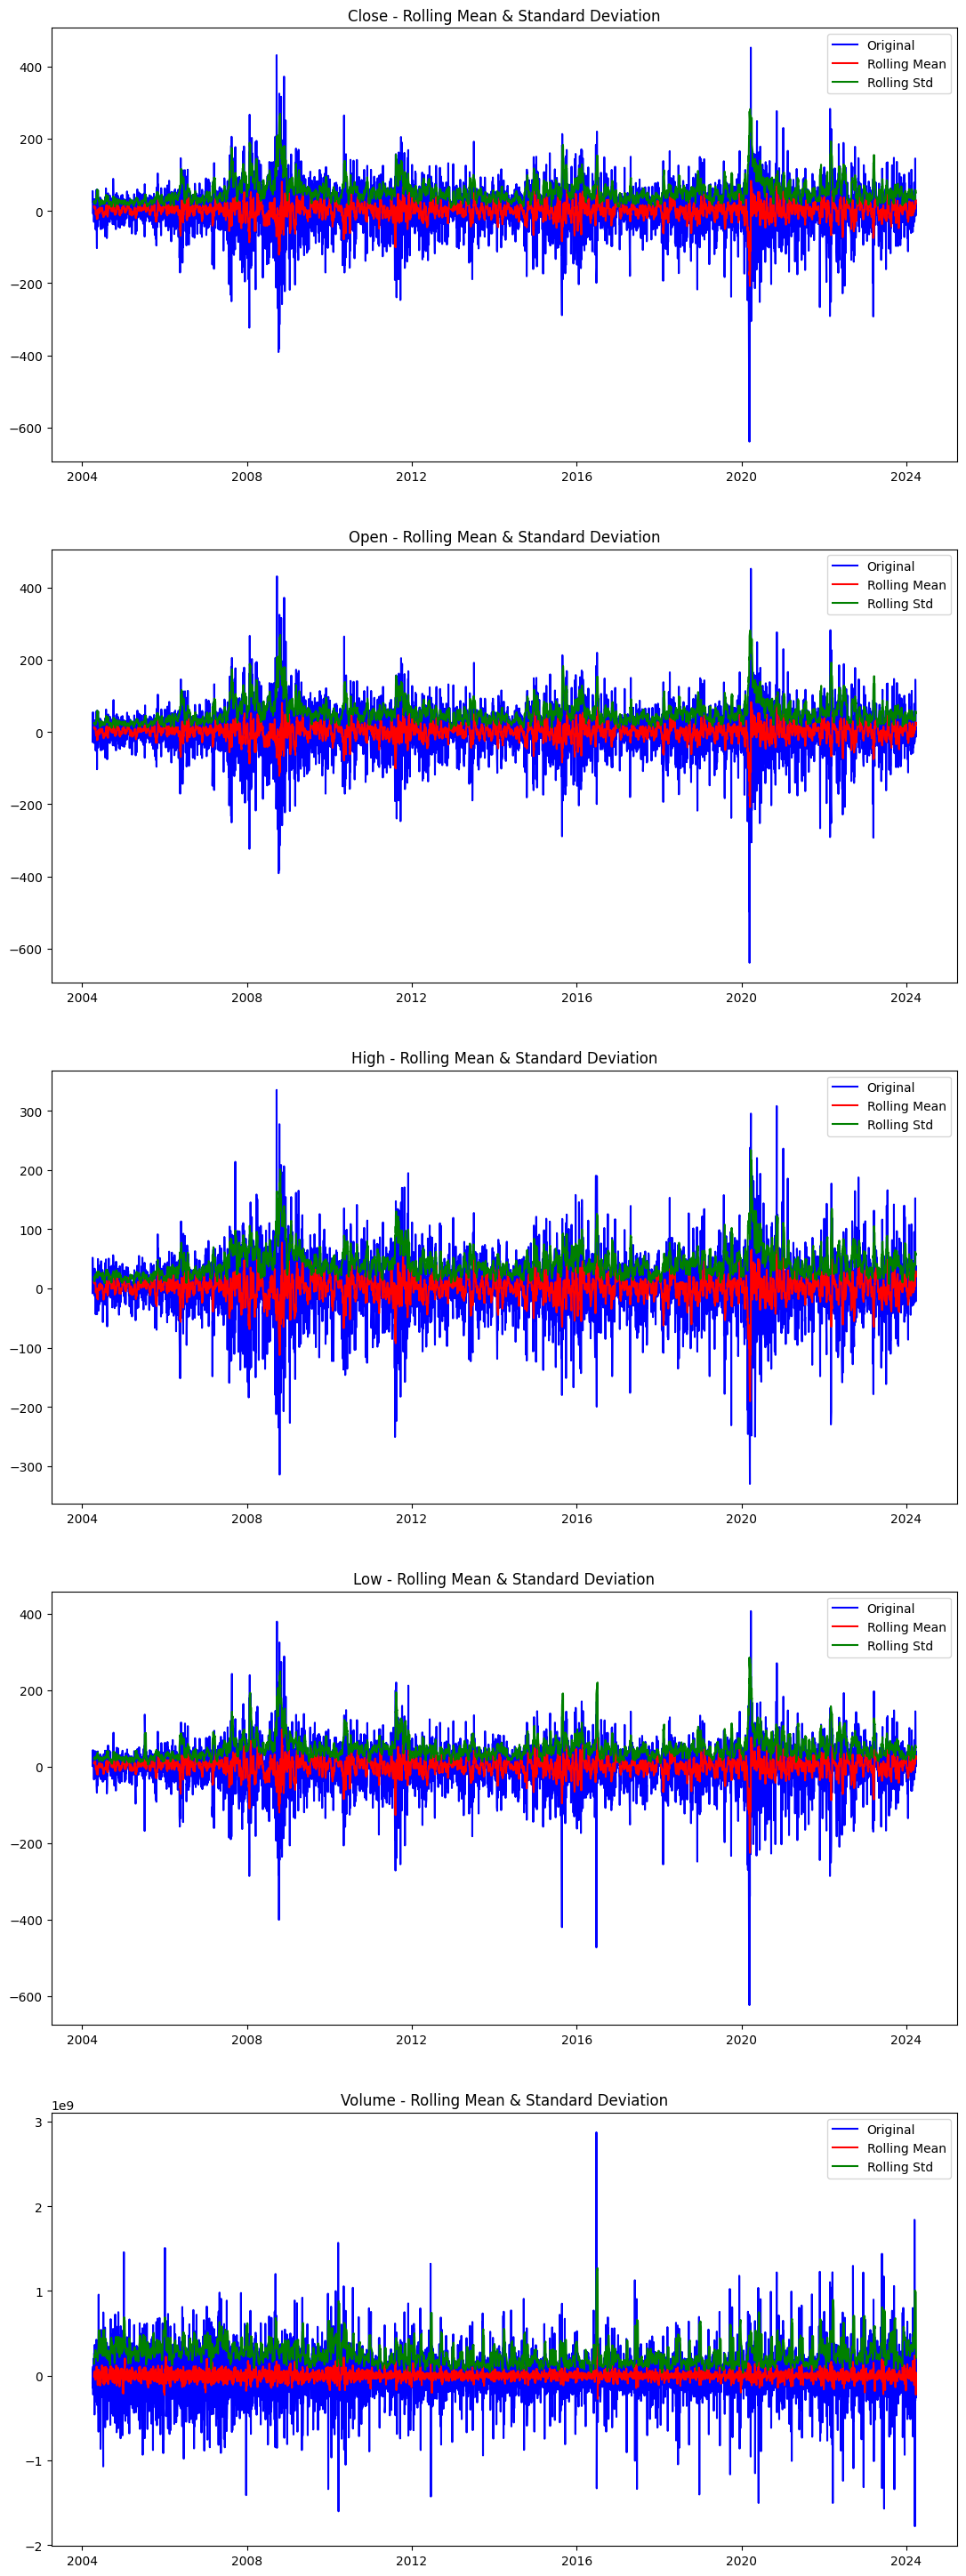

In [11]:
stationarity_check(df,1)

In [12]:
normality_check(df,1)


Normality Check for Close:
Jarque-Bera Test ---- statistic: 8402.559401393408, p-value: 0.0
Normal Test ---- statistic: 840.452568311216, p-value: 3.148064634603719e-183

Normality Check for Open:
Jarque-Bera Test ---- statistic: 8410.908606701078, p-value: 0.0
Normal Test ---- statistic: 840.3412345211623, p-value: 3.3282770155126134e-183

Normality Check for High:
Jarque-Bera Test ---- statistic: 4007.172365372617, p-value: 0.0
Normal Test ---- statistic: 526.9581988613144, p-value: 3.736637951398398e-115

Normality Check for Low:
Jarque-Bera Test ---- statistic: 16399.03574260828, p-value: 0.0
Normal Test ---- statistic: 1364.4491138358112, p-value: 5.1717736803853715e-297

Normality Check for Volume:
Jarque-Bera Test ---- statistic: 7803.587363816488, p-value: 0.0
Normal Test ---- statistic: 655.4199107131166, p-value: 4.7574553815295335e-143


### Outlier Check

Since price gradually increases, it does not make sense to use traditional outlier checking methods. Therefore we calculate the daily change and then the outliers in those

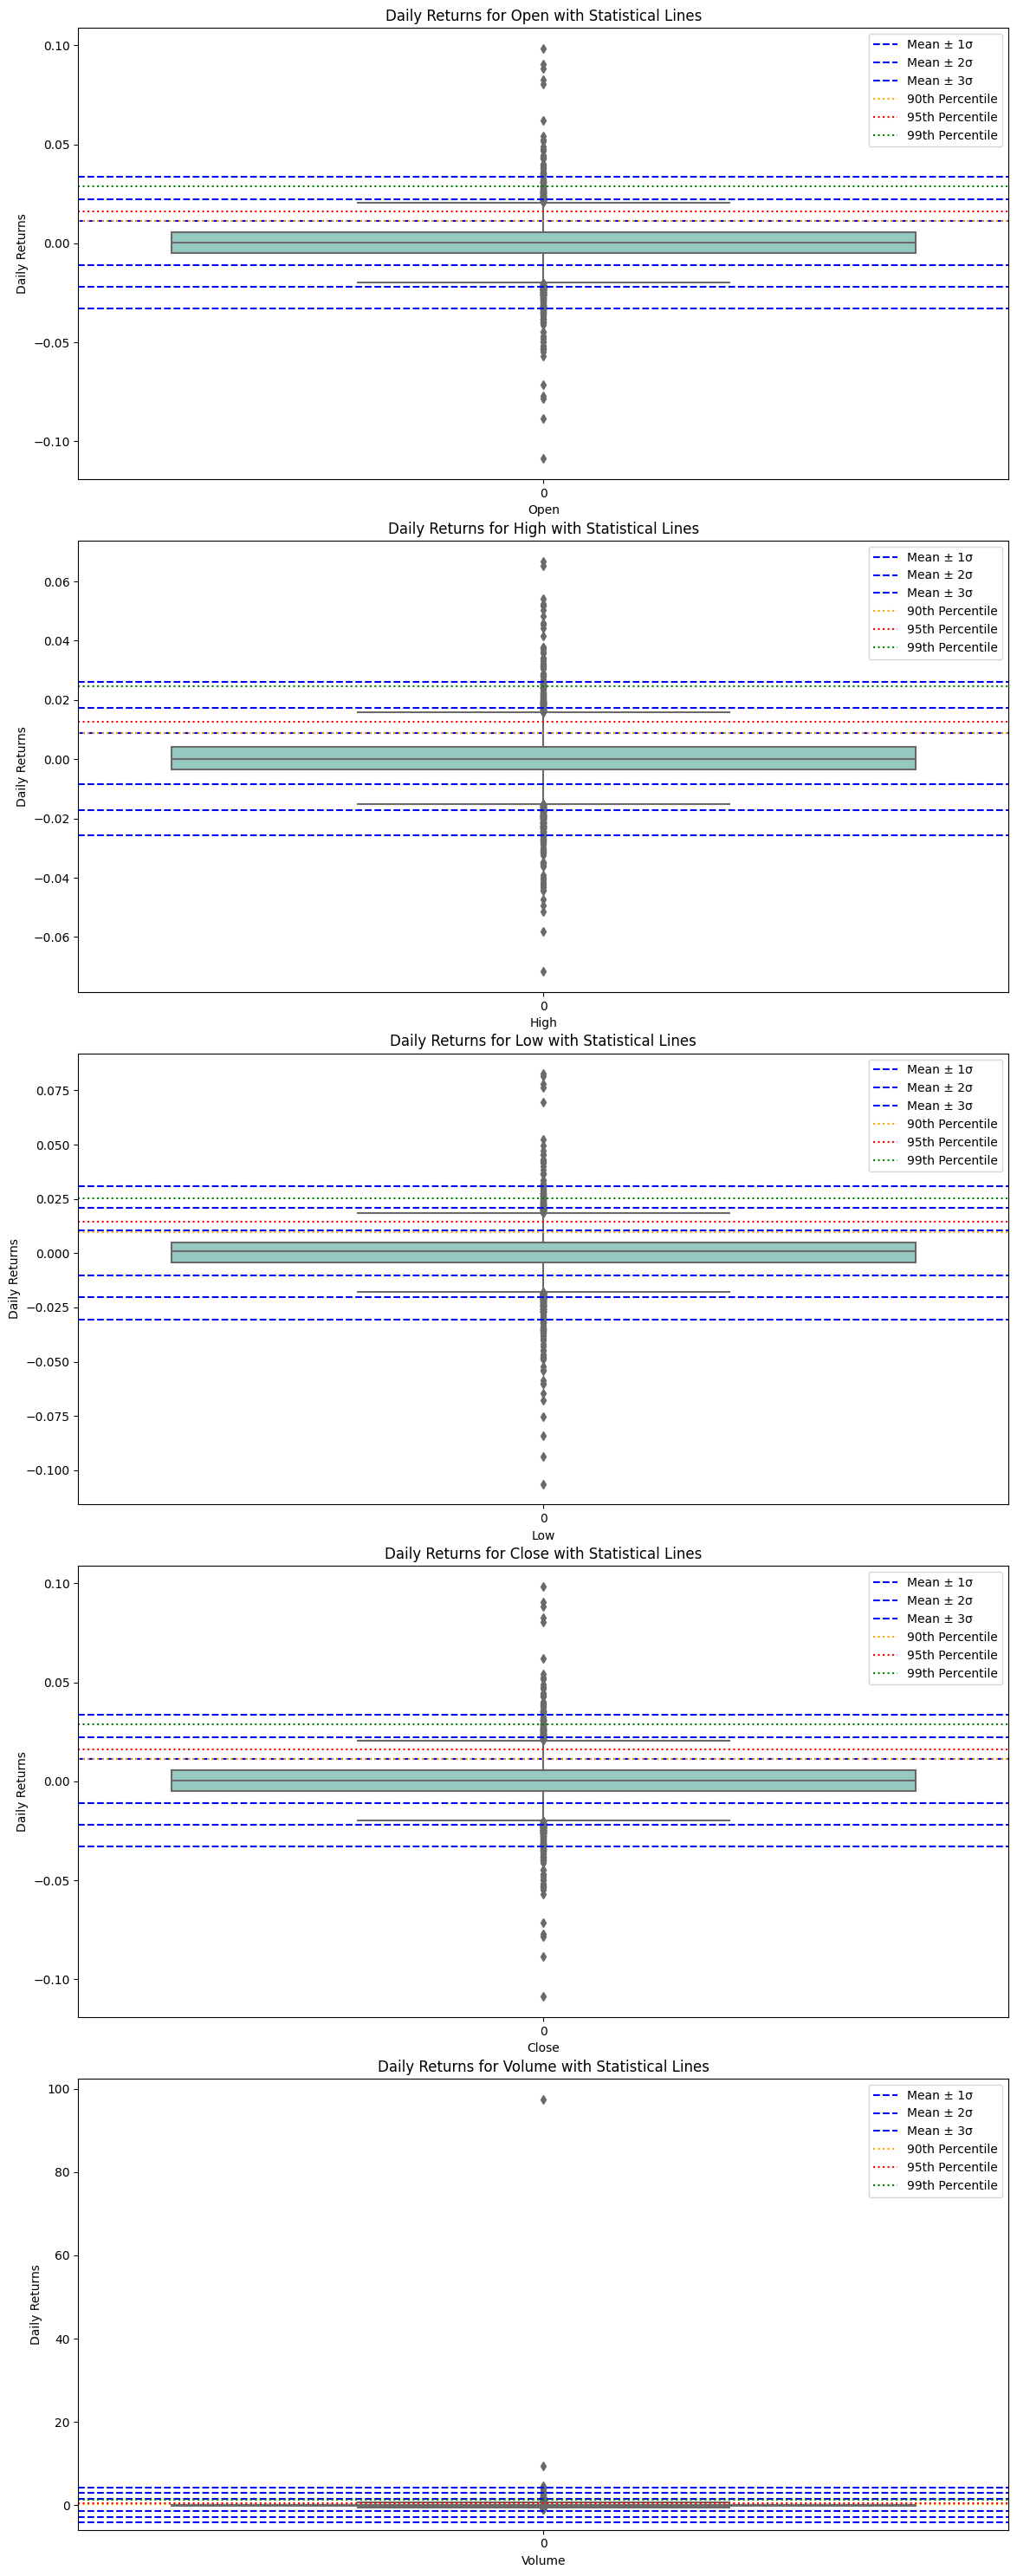

In [13]:
daily_returns(df)

## Outlier Removal 


In [14]:
df['daily_return'] = df['Close'].pct_change()
df['daily_return'] = df['daily_return'].fillna(0)
#mean plus 3sigma value for absolute daily returns
mean = df['daily_return'].mean()
std = df['daily_return'].std()
upper_limit = mean + 2*std
lower_limit = mean - 2*std
print(f'Mean: {mean}, Std: {std}, Upper Limit: {upper_limit}, Lower Limit: {lower_limit}')
#number of rows that are outside the 3 sigma range
print(f'Number of rows outside 2 sigma range: {len(df[(df["daily_return"]>upper_limit) | (df["daily_return"]<lower_limit)])}')
print(f'Percentage of rows outside 2 sigma range: {len(df[(df["daily_return"]>upper_limit) | (df["daily_return"]<lower_limit)])/len(df)*100}% ')

#if daily return is outside 3 sigma range, replace all the values with previous day's values
for i in range(1,len(df)):
    if df['daily_return'][i]>upper_limit or df['daily_return'][i]<lower_limit:
        df['Close'][i] = df['Close'][i-1]
        df['Open'][i] = df['Open'][i-1]
        df['High'][i] = df['High'][i-1]
        df['Low'][i] = df['Low'][i-1]
        df['Volume'][i] = df['Volume'][i-1]
        df['daily_return'][i] = 'NaN'

Mean: 0.00017940861374028395, Std: 0.011084199062435893, Upper Limit: 0.02234780673861207, Lower Limit: -0.021988989511131502
Number of rows outside 2 sigma range: 270
Percentage of rows outside 2 sigma range: 5.346534653465347% 


## Baseline Models


In [15]:
df_base = calculate_macd_signals(df)

Total Pofit: 42.82130660412295
Final Capital: 142.82130660412295
Overall Return: 42.82130660412295
Overall Return %: 42.82130660412295
Number of Days: 5049
Number of Trades: 745
Ratio of Trades to Days:  0.14755397108338283


In [16]:
df_base = profit_trades(df_base)

Total Pofit: 4510431.912236398
Final Capital: 4510531.912236398
Overall Return: 4510431.912236398
Overall Return %: 4510431.912236398
Number of Days: 5049
Number of Trades: 716
Ratio of Trades to Days:  0.1418102594573183


In [17]:
df_base = loss_trades(df_base)

Total Pofit: -99.99669150056606
Final Capital: 0.0033084994339420714
Overall Return: -99.99669150056606
Overall Return %: -99.99669150056606
Number of Days: 5049
Number of Trades: 701
Ratio of Trades to Days:  0.1388393741334918


## DQN

### Training

In [18]:
df_base = df[['Open','High','Low','Close','Volume']]
#include 26 and 12 ema
df_base['26ema'] = df_base['Close'].ewm(span=26).mean()
df_base['12ema'] = df_base['Close'].ewm(span=12).mean()
#fill na as 0
df_base = df_base.dropna()
df_base = df_base[['Open','High','Low','Close','Volume','26ema','12ema']]

#first 80% of the data is train
df_train = df_base.iloc[:int(len(df_base)*0.8)]
#last 20% of the data is test
df_test = df_base.iloc[int(len(df_base)*0.8):]

In [19]:
display(df_train.head())

display(df_test.head())

Open         High          Low        Close      Volume  \
Date                                                                         
2004-03-31  4412.799805  4427.200195  4382.799805  4385.700195  1715500500   
2004-04-01  4385.700195  4419.399902  4385.100098  4410.700195  1630528700   
2004-04-02  4410.700195  4471.299805  4408.000000  4465.600098  1703523700   
2004-04-05  4465.600098  4483.100098  4451.399902  4480.700195  1556481700   
2004-04-06  4480.700195  4495.200195  4462.000000  4472.799805  1664601700   

                  26ema        12ema  
Date                                  
2004-03-31  4385.700195  4385.700195  
2004-04-01  4398.680965  4399.241862  
2004-04-02  4422.724359  4425.141497  
2004-04-05  4438.931870  4442.679207  
2004-04-06  4446.785983  4450.862865

Open         High          Low        Close      Volume  \
Date                                                                         
2020-03-26  5151.600098  5419.299805  5151.600098  5190.799805  2585565700   
2020-03-27  5151.600098  5419.299805  5151.600098  5190.799805  2585565700   
2020-03-30  5510.299805  5567.200195  5351.799805  5563.700195  1136875400   
2020-03-31  5563.700195  5702.700195  5545.899902  5672.000000  1602112800   
2020-04-01  5563.700195  5702.700195  5545.899902  5672.000000  1602112800   

                  26ema        12ema  
Date                                  
2020-03-26  6078.938676  5559.412919  
2020-03-27  6013.150612  5502.703209  
2020-03-30  5979.857988  5512.087360  
2020-03-31  5957.053693  5536.689305  
2020-04-01  5935.938604  5557.506335

In [20]:
print(df_train.shape, df_test.shape)
print(df_train.shape[0] + df_test.shape[0])
print(df.shape[0])

(4040, 7) (1010, 7)
5050
5050


In [21]:
window_size = 26
states = create_states(df_train, window_size)
test_states = create_states(df_test, window_size)
input_dim_conv = states.shape[2]
output_dim = 3
print("Shape of states:", states.shape)

Shape of states: (4014, 26, 7)


In [22]:
model = ConvDQN(input_dim_conv, output_dim, window_size)
memory = ReplayMemory(50000)
agent = DQNAgent(input_dim_conv, output_dim, window_size,model, lr=0.0001, gamma=0.95, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.9995)

Episode 1/800, Total Reward: -440.51139300146485, Loss: 26.88134660341623
Episode 2/800, Total Reward: -1258.5778417968752, Loss: 23.286540932074182
Episode 3/800, Total Reward: -1258.5778417968752, Loss: 22.039661613688086
Episode 4/800, Total Reward: -543.8412259277344, Loss: 22.381352664717653
Episode 5/800, Total Reward: -587.1689208984375, Loss: 19.701776709605575
Episode 6/800, Total Reward: -281.25, Loss: 20.490553288462102
Episode 7/800, Total Reward: -13.384375927734375, Loss: 17.172036392298633
Episode 8/800, Total Reward: -654.9660791015625, Loss: 12.18544948950485
Episode 9/800, Total Reward: -543.8412259277344, Loss: 11.717472734810455
Episode 10/800, Total Reward: -617.13017578125, Loss: 10.467623688643027
Episode 11/800, Total Reward: 1.992398238140331, Loss: 9.215123932018994
Episode 12/800, Total Reward: 3.036729520104147, Loss: 8.535499985437912
Episode 13/800, Total Reward: 0.7363096837275651, Loss: 8.986336587486237
Episode 14/800, Total Reward: 1.3161752013872434, 

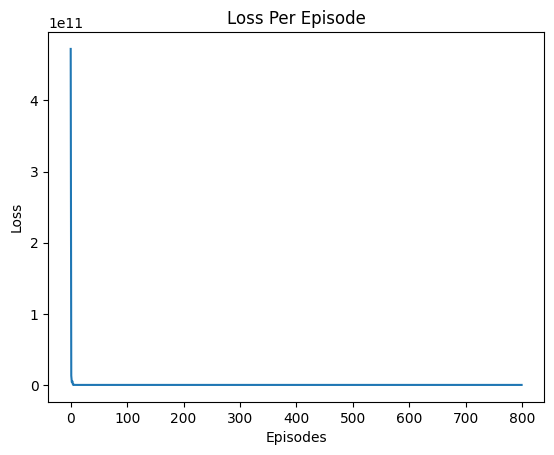

CPU times: user 1d 5h 18min 52s, sys: 7h 33min 40s, total: 1d 12h 52min 33s
Wall time: 9h 7s


In [23]:
%%time
log_train = train_agent(agent, states, 800, batch_size=32)

In [ ]:
log_train.head()

In [28]:
log_train.to_csv('FTSE100/log_train_CNN_updated_reward_MA_800ep.csv', index=False)

In [42]:
#save the model
torch.save(agent.model.state_dict(), 'FTSE100/DQN_CNN_updated_reward_MA_800ep.pth')

### Evaluating and Testing

In [ ]:
log_train = pd.read_csv('FTSE100/log_train_CNN_updated_reward_MA_800ep.csv')

In [24]:
log_train.rename(columns={'Reward':'Training_reward'}, inplace=True)

In [25]:
reward =[]
for i in range(1,log_train['Episode'].max()+1):
    last_episode = log_train[log_train['Episode'] == i]
    last_episode.reset_index(drop=True, inplace=True)
    last_episode['Close'] = last_episode['Price'].to_list()
    blockPrint()
    reward.append(list(capital_calculation(last_episode,'Action'))[-1]-100)

In [26]:
log_train['Reward'] = log_train['Episode'].apply(lambda x: reward[x-1])

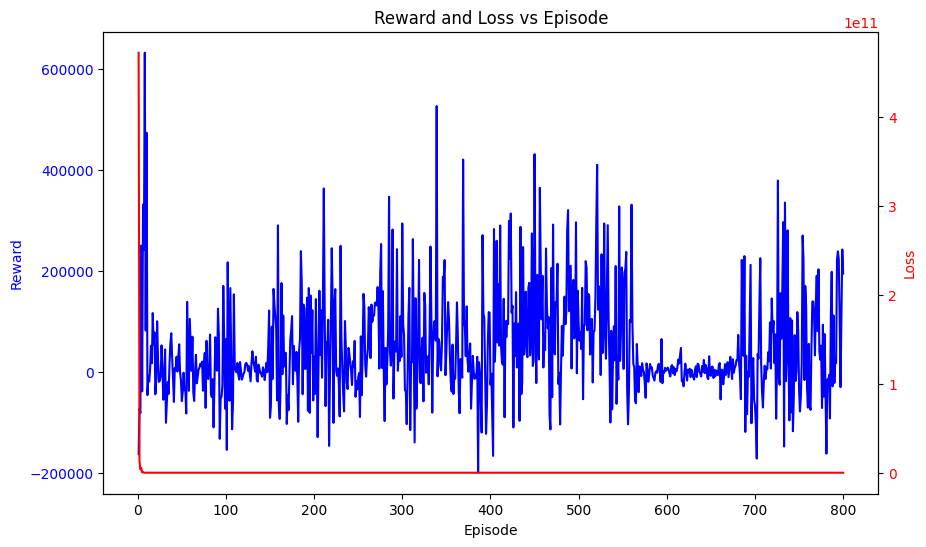

In [27]:
plot_training(log_train)

In [30]:
log_train

Episode  Time  Training_reward Action        Price          Loss  \
0              1     1         0.000000   Hold  4498.399902  4.725203e+11   
1              1     2         0.000000   Hold  4454.700195  4.725203e+11   
2              1     3         0.000000    Buy  4412.899902  4.725203e+11   
3              1     4        40.899902   Sell  4453.799805  4.725203e+11   
4              1     5        40.899902    Buy  4441.799805  4.725203e+11   
...          ...   ...              ...    ...          ...           ...   
3210395      800  4009        96.799805   Hold  5876.500000  1.380737e+04   
3210396      800  4010        96.799805   Hold  5876.500000  1.380737e+04   
3210397      800  4011        96.799805   Hold  5151.600098  1.380737e+04   
3210398      800  4012        96.799805   Hold  5190.799805  1.380737e+04   
3210399      800  4013        96.799805   Hold  5190.799805  1.380737e+04   

            Reward  
0       -40.586694  
1       -40.586694  
2       -40.586694  
3       -40.586694  
4       -40.586694  
...            ...  
3210395  48.590757  
3210396  48.590757  
3210397  48.590757  
3210398  48.590757  
3210399  48.590757  

[3210400 rows x 7 columns]

In [31]:
action_episode_df = create_action_episode_df(log_train)

In [32]:
action_episode_df = action_episode_df.apply(pd.Series.value_counts).transpose().reset_index()

<Axes: >

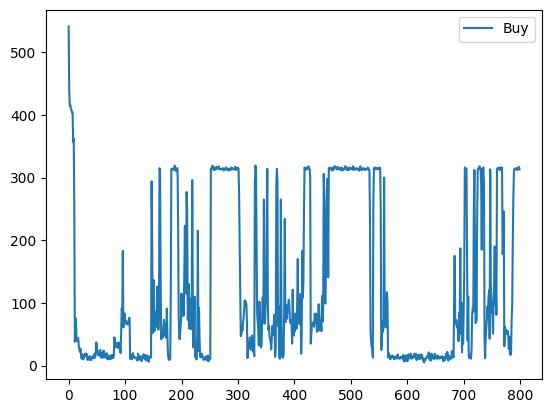

In [33]:
#get value counts of all columns in the DataFrame
action_episode_df[['Buy']].plot()

In [35]:
# Initialize the agent
test_state_size = test_states.shape[2]
action_size = 3
agent = DQNAgent(test_state_size, output_dim, window_size,model, lr=0.0001, gamma=0.95, epsilon=0, epsilon_min=0, epsilon_decay=0.9995)

In [ ]:
test_state_size

In [36]:
model_path = 'FTSE100/DQN_CNN_updated_reward_MA_800ep.pth'
agent.model.load_state_dict(torch.load(model_path))

# Ensure the model is in evaluation mode
agent.model.eval()

ConvDQN(
  (conv1): Conv1d(7, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (fc1): Linear(in_features=1664, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [37]:
evaluation_log = evaluate_agent(agent, test_states)

In [38]:
evaluation_log['Close'] = evaluation_log['Price']
evaluation_log['Capital'] = capital_calculation(evaluation_log, 'Action')

In [39]:
evaluation_log

Time Action        Price        Close     Capital
0       1   Hold  5753.799805  5753.799805  100.000000
1       2    Buy  5849.399902  5849.399902  100.000000
2       3   Hold  5853.799805  5853.799805  100.000000
3       4   Hold  5936.000000  5936.000000  100.000000
4       5   Hold  5939.700195  5939.700195  100.000000
..    ...    ...          ...          ...         ...
978   979   Sell  7737.399902  7737.399902  131.481537
979   980    Buy  7882.600098  7882.600098  131.481537
980   981   Hold  7930.899902  7930.899902  131.481537
981   982   Hold  7917.600098  7917.600098  131.481537
982   983   Sell  7931.000000  7931.000000  132.288846

[983 rows x 5 columns]

In [40]:
all_states = create_states(df_base, window_size)
all_states_eval = evaluate_agent(agent, all_states)

In [41]:
all_states_eval['Close'] = all_states_eval['Price']
all_states_eval['Capital'] = capital_calculation(all_states_eval, 'Action')
all_states_eval

Time Action        Price        Close     Capital
0        1    Buy  4498.399902  4498.399902  100.000000
1        2   Sell  4454.700195  4454.700195   99.028550
2        3   Hold  4412.899902  4412.899902   99.028550
3        4    Buy  4453.799805  4453.799805   99.028550
4        5   Hold  4441.799805  4441.799805   99.028550
...    ...    ...          ...          ...         ...
5018  5019   Hold  7737.399902  7737.399902  247.649887
5019  5020   Hold  7882.600098  7882.600098  247.649887
5020  5021   Hold  7930.899902  7930.899902  247.649887
5021  5022   Hold  7917.600098  7917.600098  247.649887
5022  5023   Hold  7931.000000  7931.000000  247.649887

[5023 rows x 5 columns]

##